# Análisis Factorial Exploratorio (AFE)

>Este tutorial es una selección y adaptación al español del libro [Multivariate Data Analysis](https://www.cengage.co.uk/books/9781473756540/) de Joseph F. Hair et al.

> Requiere cargar el archivo ["euthan.sav"](https://github.com/renatoparedes/EstadisticaYPsicologiaMatematica/raw/main/AFE/euthan.sav) en el repositorio local. 


## Diseño de un AFE

El análisis factorial exploratorio se realiza con mayor frecuencia sólo en variables métricas (cuantitativas), aunque existen métodos especializados para el uso de variables ficticias. 

Pueden incluirse un número limitado de “variables ficticias” en un conjunto de variables métricas que se analizan factorialmente siempre que representen atributos binarios.

### Tamaño de muestra

Regla de dedo: Si se está diseñando un estudio para revelar la estructura de los factores, trate de tener al menos cinco variables para cada factor propuesto.

- La muestra debe tener más observaciones que variables.
- El tamaño mínimo absoluto de la muestra debe ser de 50 observaciones, siendo 100 observaciones el mínimo preferido.
- Aumente la muestra a medida que aumenta la complejidad del análisis factorial (es decir, el número de variables y / o factores retenidos).
- Esfuércese por maximizar el número de observaciones por variable, con una proporción deseada de al menos 5 observaciones por variable.
- Las comunalidades más altas entre las variables brindan soporte para tamaños de muestra más pequeños, en igualdad de condiciones.

## Supuestos de un AFE

Un supuesto básico del análisis factorial es que **existe alguna estructura subyacente en el conjunto de variables seleccionadas**. La presencia de variables correlacionadas y la posterior definición de factores no garantizan la relevancia, incluso si cumplen con los requisitos estadísticos. 

Es responsabilidad del investigador asegurarse de que los patrones observados sean conceptualmente válidos y apropiados para estudiar con análisis factorial exploratorio, porque la técnica no tiene ningún medio para determinar la idoneidad más que las correlaciones entre variables. 

Por ejemplo, no es apropiado mezclar variables dependientes e independientes en un análisis de un solo factor y luego usar los factores derivados para respaldar las relaciones de dependencia.

### Supuestos estadísticos

El investigador debe asegurarse de que la matriz de datos tenga correlaciones suficientes para justificar la aplicación del AFE. 

Si se encuentra que todas las correlaciones son bajas, o que todas las correlaciones son iguales (lo que denota que no existe una estructura para agrupar las variables), entonces el investigador debe cuestionar la aplicación del AFE. Para ello, se encuentran disponibles varios enfoques:

#### Inspección visual

Si la inspección visual revela un **pequeño número de variables con correlaciones mayores de .30**, entonces el AFE probablemente sea inapropiado.

Veamos un ejemplo:


In [13]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

df = pd.read_spss('euthan.sav')
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)
scaled_df = pd.DataFrame(scaled_data, columns=df.columns)
scaled_df

,e1,e2,e3,e4,e5,e6,e7,e8,e9,e10,e11,e12
0,0.857588,0.785601,0.119556,0.154735,0.686161,0.865330,0.272019,0.041718,0.881063,0.916052,0.039223,0.011506
1,-0.867251,-0.472065,-0.717338,-0.781541,-0.402548,-0.270416,-0.595042,-1.022102,-0.072087,-1.728400,-0.784465,0.011506
2,0.857588,0.785601,-1.554233,0.154735,0.686161,0.865330,0.272019,0.041718,0.881063,0.916052,1.686599,0.833058
3,-0.004831,0.785601,-1.554233,0.154735,0.686161,0.865330,1.139081,1.105538,-1.025236,0.916052,0.039223,0.011506
4,-0.867251,-0.472065,0.956451,-0.781541,-1.491256,-0.270416,0.272019,0.041718,-1.025236,0.034568,0.039223,0.833058
...,...,...,...,...,...,...,...,...,...,...,...,...
352,0.857588,-0.472065,-1.554233,0.154735,0.686161,-0.270416,-0.595042,0.041718,-0.072087,0.916052,0.039223,0.011506
353,0.857588,0.785601,-0.717338,-0.781541,0.686161,0.865330,-0.595042,-1.022102,0.881063,0.916052,-0.784465,-0.810046
354,0.857588,0.785601,-0.717338,1.091011,0.686161,0.865330,1.139081,0.041718,0.881063,0.916052,1.686599,0.833058
355,-0.004831,-0.472065,-0.717338,0.154735,0.686161,-0.270416,0.272019,0.041718,-0.072087,0.034568,0.862911,0.011506


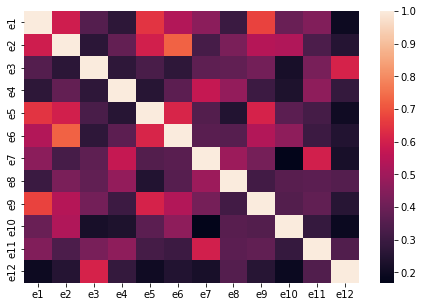

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(7.5,5))
sns.heatmap(scaled_df.corr());

Las correlaciones entre variables también se pueden analizar calculando las correlaciones parciales entre variables. Una correlación parcial es la correlación que no se explica cuando se tienen en cuenta los efectos de otras variables. 

Si existen factores “verdaderos” en los datos, la correlación parcial debe ser pequeña, porque la variable puede explicarse por la carga de las variables sobre los factores. Si las correlaciones parciales son altas, lo que indica es que no hay factores subyacentes, entonces el análisis factorial exploratorio no es apropiado.

Una regla general sería considerar las correlaciones parciales superiores a 0,7 como altas.

Veamos las correlaciones parciales en nuestro ejemplo:

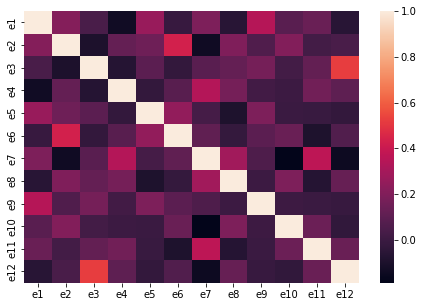

In [15]:
import pingouin as pg

plt.figure(figsize=(7.5,5))
sns.heatmap(scaled_df.pcorr());

Podemos apreciar que son pocas las variables que presentan correlaciones por encima de 0.7.

#### Prueba de Bartlett

La prueba de esfericidad de Bartlett es una prueba estadística de la presencia de correlaciones entre las variables. Proporciona la significancia estadística que indica que la matriz de correlación tiene correlaciones significativas entre al menos algunas de las variables. 

El investigador debe tener en cuenta, sin embargo, que al aumentar el tamaño de la muestra, la prueba de Bartlett se vuelve más sensible para detectar correlaciones entre las variables.

Apliquemos la prueba de Bartlett en nuestro ejemplo:

In [11]:
!pip install factor_analyzer

     |████████████████████████████████| 40 kB 1.0 MB/s 
  Created wheel for factor-analyzer: filename=factor_analyzer-0.3.2-py3-none-any.whl size=40380 sha256=2aabcaecedea939cdce7b00086ff4eeaa86f3dcbcfe214ee4aecf592f50fea43
  Stored in directory: /home/renato/.cache/pip/wheels/b1/d4/b5/9da0e0e81266e87f5e85068f031077c8a2ae0eedf76ea1d294
Successfully built factor-analyzer


In [29]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity

statistic, p_value = calculate_bartlett_sphericity(scaled_df)
print("Chi-cuadrado: ", statistic)
print("Valor p: ", p_value)

Chi-cuadrado:  2047.1262764312712
Valor p:  0.0


Una prueba de esfericidad de Bartlett estadísticamente significativa ($p < 0.50$) indica que existen correlaciones suficientes entre las variables para proceder.

#### Medida de adecuación del muestreo (MSA)

Este índice va de 0 a 1, llegando a 1 cuando cada variable puede ser perfectamente predicha sin error por las demás variables.

La MSA se puede interpretar con las siguientes pautas:
- $> .80$: meritorio
- $> .70$: medio
- $> .60$: mediocre
- $> .50$: miserable
- $< .50$: inaceptable.

El MSA aumenta a medida que (1) aumenta el tamaño de la muestra, (2) aumentan las correlaciones promedio, (3) aumenta el número de variables o (4) disminuye el número de factores.

En general, **los valores de MSA deben exceder .50 tanto para la prueba general como para cada variable individual**. 

Las variables con valores inferiores a .50 deben omitirse del análisis factorial una a la vez, omitiendo la más pequeña cada vez.

Apliquemos esta medida en nuestro ejemplo:

In [28]:
from factor_analyzer.factor_analyzer import calculate_kmo

kmo_per_variable, kmo_total = calculate_kmo(scaled_df)

print("MSA general: ", kmo_total)
print("MSA individual: ", kmo_per_variable)

MSA general:  0.8645475574059576
MSA individual:  [0.88109859 0.86667988 0.80575109 0.86839977 0.91121343 0.88275977
 0.80074253 0.86904428 0.91963489 0.88876132 0.87669668 0.75080834]


Nuestro ejemplo cumple con medidas de MSA adecuadas tanto a nivel individual como a nivel general.

## Determinar el número de factores a extraer

Al momento de extraer factores, el primer factor puede verse como el mejor resumen individual de las relaciones lineales exhibidas en los datos. El segundo factor se define como la segunda mejor combinación lineal de las variables, sujeta a la restricción de que es ortogonal al primer factor.

Para ser ortogonal al primer factor, el segundo factor debe derivarse solo de la varianza restante después de que se haya extraído el primer factor. Por lo tanto, el segundo factor puede definirse como la combinación lineal de variables que explica la mayor varianza que aún no se explica después de que el efecto del primer factor se ha eliminado de los datos.

El proceso continúa extrayendo factores que representan cantidades cada vez más pequeñas de variación hasta que se explica toda la varianza.

La pregunta clave es: ¿cuántos factores extraer o retener?

Al decidir cuándo dejar de factorizar (es decir, cuántos factores extraer), el investigador debe combinar una base conceptual (¿cuántos factores deberían estar en la estructura?) con alguna evidencia empírica (¿cuántos factores pueden ser razonablemente respaldados?).

No se ha desarrollado una base cuantitativa definitiva para decidir el número de factores a extraer. Sin embargo, actualmente se utilizan las siguientes reglas para definir para la cantidad de factores a extraer:

- Criterio de Kaiser
- Criterio de la varianza explicada
- Criterio Scree plot
- Análisis paralelo de Horn

https://www.datasklr.com/principal-component-analysis-and-factor-analysis/factor-analysis

